In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 5, 5)
    images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")

In [3]:
perfect_data = {
    "P": [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    "Y": [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "T": [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "H": [1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "O": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "N": [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1]
}

In [82]:
n_train = 6
n_test = 1000

In [83]:
# no of images to show in output plot
n_train_disp = 10

# Amount of distortion (0 < distort < 1)
distort = 0.3

# Size of image(width)
n_side = 5

# No of neurons
n_neurons = n_side * n_side

In [84]:
train_data = [np.array(d) for d in perfect_data.values()][:n_train]


In [85]:
test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

In [115]:
-a


array([ 1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1])

In [116]:
np.multiply(-a, (-a)) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [117]:
def train(neu, training_data):
    w = np.zeros([neu, neu])
    for data in training_data:
        w += np.outer(data, data)
    for diag in range(neu):
        w[diag][diag] = 0
    print(w)
    return w

In [87]:
def test(weights, testing_data):
    success = 0.0

    output_data = []

    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = retrieve_pattern(weights, noisy_data)
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data

In [88]:
def retrieve_pattern(weights, data, steps=10):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            if raw_v > 0:
                res[i] = 1
            else:
                res[i] = -1
    return res

In [118]:
W = train(n_neurons, train_data)

[[ 0.  0.  0.  0.  4.  2. -2. -4. -4.  2.  2. -2.  4. -2.  0.  2. -6. -2.
  -4.  0.  2. -4.  0. -4.  0.]
 [ 0.  0.  6.  6. -2.  0. -4.  2. -2.  0.  0.  0. -2.  0. -2.  0.  0.  0.
  -2. -2.  0.  2.  2.  2. -2.]
 [ 0.  6.  0.  6. -2.  0. -4.  2. -2.  0.  0.  0. -2.  0. -2.  0.  0.  0.
  -2. -2.  0.  2.  2.  2. -2.]
 [ 0.  6.  6.  0. -2.  0. -4.  2. -2.  0.  0.  0. -2.  0. -2.  0.  0.  0.
  -2. -2.  0.  2.  2.  2. -2.]
 [ 4. -2. -2. -2.  0.  0.  0. -2. -2.  0.  0. -4.  2. -4.  2.  0. -4.  0.
  -2.  2.  0. -2.  2. -2.  2.]
 [ 2.  0.  0.  0.  0.  0. -2. -4. -4.  6.  6.  2.  0.  2.  4.  6. -2. -6.
   0.  4.  6.  0. -4.  0.  4.]
 [-2. -4. -4. -4.  0. -2.  0.  0.  4. -2. -2. -2.  0. -2.  0. -2.  2.  2.
   4.  0. -2.  0.  0.  0.  0.]
 [-4.  2.  2.  2. -2. -4.  0.  0.  2. -4. -4.  0. -2.  0. -2. -4.  4.  4.
   2. -2. -4.  2.  2.  2. -2.]
 [-4. -2. -2. -2. -2. -4.  4.  2.  0. -4. -4.  0. -2.  0. -2. -4.  4.  4.
   2. -2. -4.  2.  2.  2. -2.]
 [ 2.  0.  0.  0.  0.  6. -2. -4. -4.  0.  6.  2.  0.  

In [90]:
accuracy, op_imgs = test(W, test_data)


In [91]:
print("Accuracy of the network is %f" % (accuracy * 100))

Accuracy of the network is 12.400000


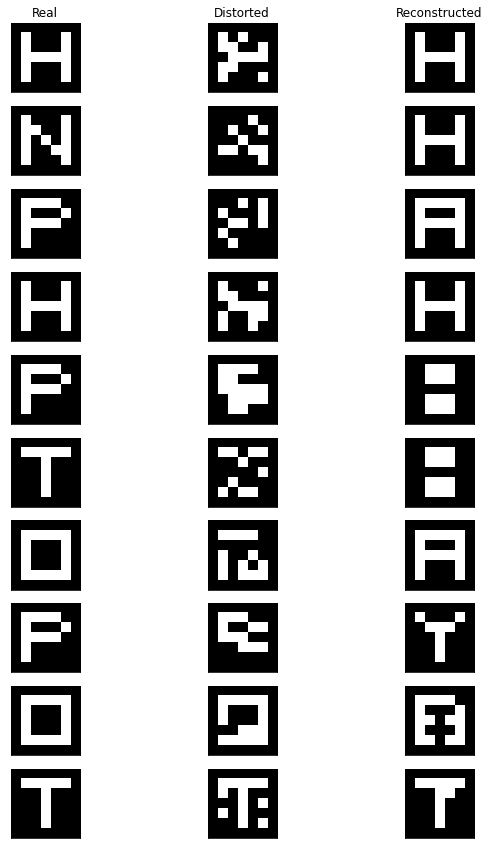

In [92]:
plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()